In [1]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open('../hand_anno.json', 'r') as f:
    anno = json.load(f)
print(len(anno['samples']))

4463


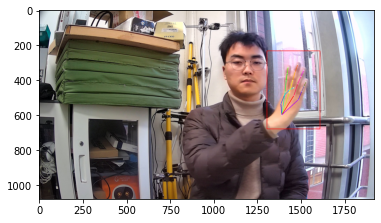

In [14]:

sample = anno['samples'][2010]
frame_path = sample['frame_path']
hands = sample['hands']

import sys
sys.path.append('/home/zg/wdir/zg/moyu/GestureDet/LightGestureDet/Ultralight-SimplePose')
from pose_utils.vis import draw_result_on_img

img = cv2.imread(frame_path)
height, width, _ = img.shape
MARGIN = 80   # enlarge the original bbox by MARGIN
for hand in hands:
    img = draw_result_on_img(img, hand)
    hand = np.array(hand)
    leftmost_x, rightmost_x = max(int(np.min(hand[:, 0]))- MARGIN, 0), min(int(np.max(hand[:, 0])) + MARGIN, width)
    top_most_y, bottom_most_y = max(int(np.min(hand[:, 1])) - MARGIN, 0), min(int(np.max(hand[:, 1])) + MARGIN, height)
    img = cv2.rectangle(img, (leftmost_x, top_most_y), (rightmost_x, bottom_most_y), color=(0, 0, 255), thickness=2)

plt.imshow(img[:, :, ::-1])

[[935, 209, 661, 871, 1, 1], [392.0, 236.0, 1153.0, 833.0, 0.96875, 0.0], [1720.0, 780.0, 150.0, 138.0, 0.8466796875, 2.0], [1544.0, 850.0, 168.0, 120.0, 0.74072265625, 2.0], [1852.0, 951.0, 66.0, 125.0, 0.65625, 2.0], [1653.0, 981.0, 207.0, 97.0, 0.60693359375, 2.0]]


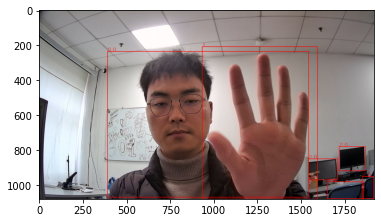

In [8]:
with open('../object_anno.json', 'r') as f:
    anno = json.load(f)

sample = anno['samples'][0]
frame_path = sample['frame_path']
objects = sample['object_bboxes']
print(objects)

img = cv2.imread(frame_path)
height, width, _ = img.shape
MARGIN = 80   # enlarge the original bbox by MARGIN
for obj in objects:
    x, y, w, h, conf, cls_ = obj
    img = cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), color=(0, 0, 255), thickness=2)
    img = cv2.putText(img, str(cls_), (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)

plt.imshow(img[:, :, ::-1])

368


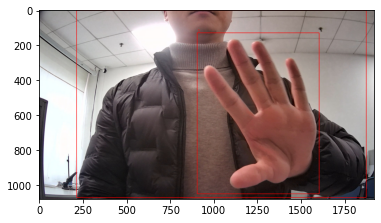

In [13]:
with open('../object_anno.json', 'r') as f:
    anno = json.load(f)

for i, sample in enumerate(anno['samples']):
    frame_path = sample['frame_path']
    if frame_path == '/home/zg/wdir/zg/moyu/GestureDet/Datasets/SelfCollected/frames/WIN_20220219_11_37_44_Pro_1101.jpg':
        objects = sample['object_bboxes']
        # print(objects)
        break
print(i)

img = cv2.imread(frame_path)
height, width, _ = img.shape
MARGIN = 80   # enlarge the original bbox by MARGIN
for obj in objects:
    x, y, w, h, conf, cls_ = obj
    img = cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), color=(0, 0, 255), thickness=2)
    img = cv2.putText(img, str(cls_), (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 2, (0,0,255), 1)

plt.imshow(img[:, :, ::-1])